# Chapter 15

## Model selection and simplicity

The task of statistical inference, as we have pursued it here for the most part, is parameteric: it presupposes that one has already selected a family of parameters (binomials, normals, poisson, etc) at the beginning of the inquiry. But how does one know that this choice is right? This is the task of model selection. We go over one facet of it in this chapter, namely AIC and BIC.

Simplicity is recognized as a component of theory choice, but it is often given a pragmatic or even aesthetic dimension. Sober noted that AIC and BIC can be viewed as fashinoning a systematic way to work out the tradeoff between simplicity and likelihood. Further, while it might not wear it on its sleeves, there are considerations related to Kullback-Lieber divergence which recommend or suggest a more rational or epistemic aspect to AIC and BIC.

## Curve fitting with normals example

Here is a paradigmatic model selection problem.

I have a lot of data points $(x_1, y_1), \ldots, (x_n,y_n)$ and I am thinking that the $y$-variable in my population is some elementary function of the $x$-variable in my population, modulo some random 'noise factor' which I will model with $N(0,\sigma)$. Hence, I am thinking that the model is going to be one of the following:

- *Linear*: $Y = b_1\cdot X+b_0+ \epsilon$, where $\epsilon\sim N(0, \sigma)$.

- *Quadratic*: $Y = b_2\cdot X^2+b_1\cdot X+ b_0+\epsilon$, where $\epsilon\sim N(0, \sigma)$.

- *Cubic*: $Y= b_3\cdot X^3+ b_2\cdot X^2+b_1\cdot X+b_0+ \epsilon$, where $\epsilon\sim N(0, \sigma)$. 

Which do I choose and why? Is there anything rational to this choice?

Note that *Quaratic* has one more parameter than *Linear*, and *Cubic* has one more parameter than *Quadratic*.

(For discussion of examples like this, see Haslwanter {cite}`Haslwanter2022-ak` pp. 238 ff).

## Combining binomial data example

Here is another example where model selection arises, in a slightly less obvious way but which is nonetheless ubiquitious.

I am doing a trial of a new social intervention in one country, and you are doing it in another. 

- I had $n$ participants and model the number $X$ of successes in my population with $Binom(n, \theta)$ with pdf $p_{\theta}$ where $\theta$ is unknown (we are using data to learn about it)
- You had $m$ participants and model the successes $Y$ in your population with $Binom(m, \theta^{\prime})$ with pdf $p_{\theta^{\prime}}$ where $\theta^{\prime}$ is unknown (we are using data to learn about it). 

How should we model the combination of our two populations? 

- *One*: Should we model it as $X+Y\sim Binom(n+m, \theta^{\prime\prime})$ for some unknown $\theta^{\prime\prime}$?
- *Two*: Or at the other extreme should we assume that $X,Y$ are independent of one another and model the "joint distribution" $P(X=x \wedge Y=y)=P(X=x)\cdot P(Y=y)=p_{\theta}(x)\cdot p_{\theta^{\prime}}(y)$?

These names *One* and *Two* are given because *Two* has one more parameter than *One*.

(This example is a binomial version of Sober's normal example invovling farms from {cite}`Sober2015-of` pp. 129 ff. It is also covered in the case $k=2$ and $k=4$ of the discussion in Konishi-Kitagawa {cite}`Konishi2024-gk` pp. 75 ff of "Checking the Equality of Two Discrete Distributions").

## AIC and BIC

### AIC 

This is due to Akaike {cite}`Akaike1974-dx`, after whom it is named. The AIC of a model is defined by:

$$ AIC = 2k - 2\cdot log(p(x\mid \theta_{max}))$$

where $k$ is the dimension of the parameters (how many real numbers you need to define it); and $p_{\theta} = p(\cdot \mid \theta)$ is the pdf of the family as a function of the choice of parameters; and $\theta_{max}$ is where the likelihood $p(x\mid \theta)$ takes its maximum once $x$ is fixed.

The way this is used it: lower AIC scores are better.

Often one will see $\theta_{max}$ abbreviated as $\widehat{\theta}$; note that this depends on $x$, but when people are writing it they just assume $x$ the exact observed value is fixed.

Note that Sober does not include the constant 2, and he reverses the subtraction, so that on his way of talking higher AIC scores are better.

### BIC 

The companion notion of BIC was defined by Schwarz {cite}`Schwarz1978-ja`. The BIC of a model is defined by:

$$ BIC = k\cdot \ln(n) - 2\cdot log(p(x\mid \theta_{max}))$$

where $n$ is the number of observations, and where everything else is the same as in AIC.

## Revisiting the combining binomial data example

We can graph the AIC and BIC in the 'combining binominal example' as follows.

(For the correctneess of the equations we use here, see Konishi-Kitagawa {cite}`Konishi2024-gk` pp. 75 ff of "Checking the Equality of Two Discrete Distributions". For discussion of the correctness, see Konishi-Kitagawa {cite}`Konishi2024-gk` pp. 84 ff of "Variable Selection for Regression Model").

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import comb
import matplotlib.patches as mpatches
import metakernel
import ipywidgets as widgets    
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [2]:
def binom_aic_bic_visual(n,m):

    X = np.arange(0, n)
    Y = np.arange(0, m)
    x,y = np.meshgrid(X, Y)

    e = 1e-10  # small constant

    log_one = np.log(comb(n+m, x+y) + e)-(x+y)*np.log((x+y)/(n+m) + e)-((n+m)-(x+y))*np.log((n+m-(x+y))/(n+m) + e)
    log_two = np.log(comb(n, x) + e)-x*np.log(x/n + e)-(n-x+y)*np.log((n-x)/n + e)+ np.log(comb(m, y) + e)-y*np.log(y/m + e)-(m-y+x)*np.log((m-y)/m + e)
    
    aic_one = -2*(log_one-3)
    aic_two = -2*(log_two-4)
    bic_one = -(2*log_one-1*np.log(n+m))
    bic_two = -(2*log_two-2*np.log(n+m))

    fig = plt.figure(figsize=(20, 5))

    # Create 3D subplots
    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132, projection='3d')
    ax3 = fig.add_subplot(133, projection='3d')

    # Plot log_one and log_two on the left
    ax1.plot_surface(x, y, log_one, cmap='viridis', label='log MLE_one')
    ax1.plot_surface(x, y, log_two, cmap='plasma', label='log MLE_two')
    ax1.set_title('log MLE_one vs. log MLE_two')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.legend()


    # Plot aic_one and aic_two on the right
    ax2.plot_surface(x, y, aic_one, cmap='viridis', label='AIC_one')
    ax2.plot_surface(x, y, aic_two, cmap='plasma', label='AIC_two')
    ax2.set_title('AIC_one vs. AIC_two')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.legend()

    # Plot aic_one and aic_two on the right
    ax3.plot_surface(x, y, bic_one, cmap='viridis', label='BIC_one')
    ax3.plot_surface(x, y, bic_two, cmap='plasma', label='BIC_two')
    ax3.set_title('BIC_one vs. BIC_two')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.legend()

    fig.suptitle('Two ways of combining Binom(%i,θ) and Binom(%i,θ\')' % (n,m), fontsize=16)
    fig.subplots_adjust(top=.2)


    plt.tight_layout()
    plt.show()

In [3]:
interactive(binom_aic_bic_visual,  n=(1, 500), m=(1, 500))

interactive(children=(IntSlider(value=250, description='n', max=500, min=1), IntSlider(value=250, description=…

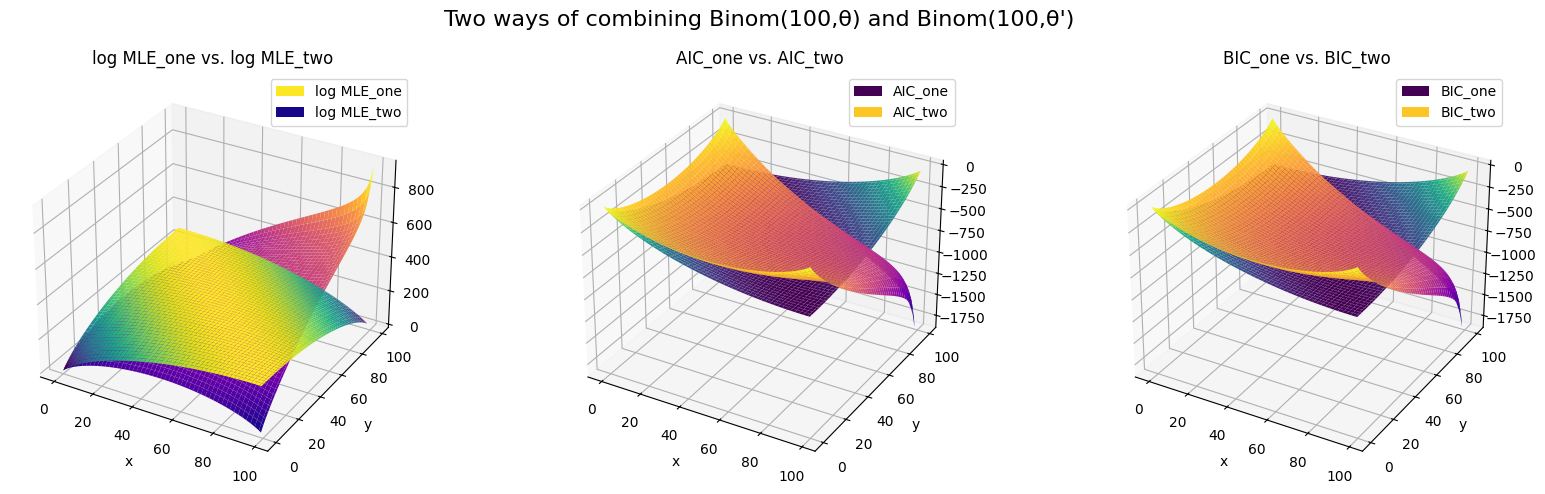

In [12]:
binom_aic_bic_visual(100,100)

In [4]:
def binom_aic_bic_visual_compare(n,m):

    X = np.arange(0, n)
    Y = np.arange(0, m)
    x,y = np.meshgrid(X, Y)
 
    e = 1e-5  # small constant

    log_one = np.log(comb(n+m, x+y) + e)-(x+y)*np.log((x+y)/(n+m) + e)-((n+m)-(x+y))*np.log((n+m-(x+y))/(n+m) + e)
    log_two = np.log(comb(n, x) + e)-x*np.log(x/n + e)-(n-x+y)*np.log((n-x)/n + e)+ np.log(comb(m, y) + e)-y*np.log(y/m + e)-(m-y+x)*np.log((m-y)/m + e)
    log_compare = log_two - log_one

    aic_one = -2*(log_one-3)
    aic_two = -2*(log_two-4)
    aic_compare = aic_two - aic_one

    bic_one = -(2*log_one-1*np.log(n+m))
    bic_two = -(2*log_two-2*np.log(n+m))
    bic_compare = bic_two - bic_one

    fig = plt.figure(figsize=(20, 5))

    # Create 3D subplots
    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132, projection='3d')
    ax3 = fig.add_subplot(133, projection='3d')

    # Plot log_one and log_two on the left
    ax1.plot_surface(x, y, log_compare, cmap='coolwarm')
    ax1.set_title('log MLE_two - log MLE_one')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')



    # Plot aic_one and aic_two on the right
    ax2.plot_surface(x, y, aic_compare, cmap='coolwarm')
    ax2.set_title('AIC_two - AIC_one')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')



    # Plot aic_one and aic_two on the right
    ax3.plot_surface(x, y, bic_compare, cmap='coolwarm')
    ax3.set_title('BIC_two - BIC_one')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')


    fig.suptitle('Two ways of combining Binom(%i,θ) and Binom(%i,θ\')' % (n,m), fontsize=16)
    fig.subplots_adjust(top=.2)



    plt.tight_layout()
    plt.show()

In [5]:
interact(binom_aic_bic_visual_compare, n=(1, 500), m=(1, 500))

interactive(children=(IntSlider(value=250, description='n', max=500, min=1), IntSlider(value=250, description=…

<function __main__.binom_aic_bic_visual_compare(n, m)>

We can graph the same information not as two surface graphs but as the difference between them. The color scheme is organized so that reds are positive and blues are negative.

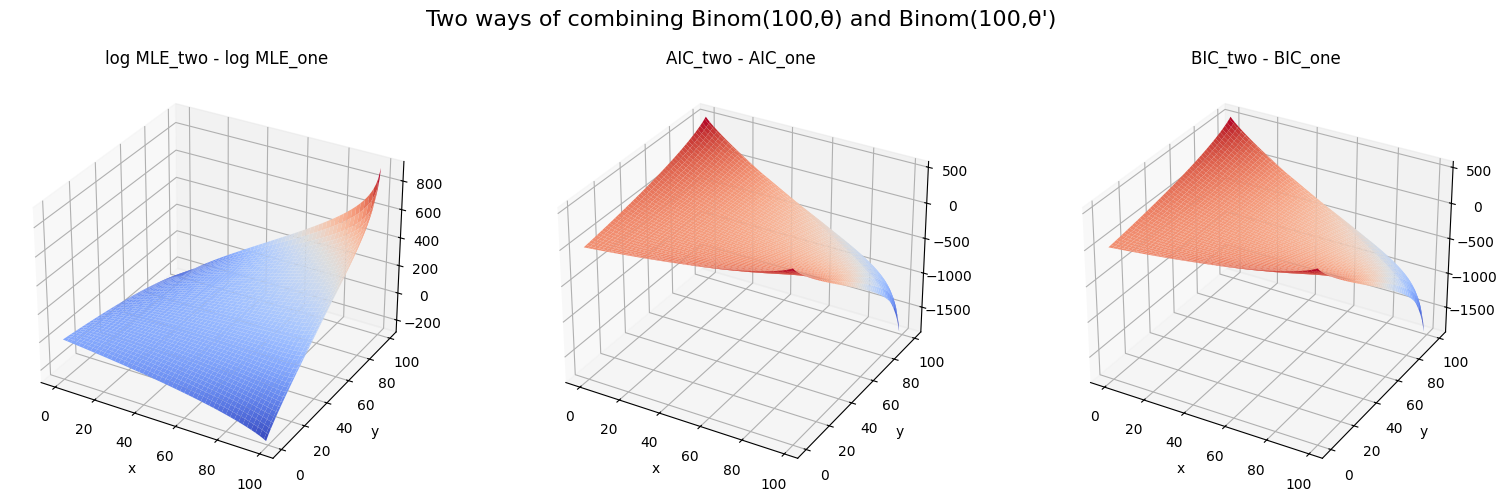

In [11]:
binom_aic_bic_visual_compare(100,100)

## Revisiting the curve fitting with normals example

We can visual the curve-fitting with normal example as follows. 

(To generate these images, we use the python code from Haslwanter {cite}`Haslwanter2022-ak` pp. 238 ff)).

In [6]:
def curve_fitting(n,b_0,b_1,b_2, c):

    x = np.arange(n)
    y = b_0+b_1*x +b_2*x**2 + c*np.random.randn(len(x))

    np.set_printoptions(precision=3)

    M1 = np.column_stack((np.ones_like(x), x))
    M2 = np.column_stack((np.ones_like(x), x, x**2))
    M3 = np.column_stack((np.ones_like(x), x, x**2, x**3))

    p1 = np.linalg.lstsq(M1, y, rcond=None)
    p2 = np.linalg.lstsq(M2, y, rcond=None)
    p3 = np.linalg.lstsq(M3, y, rcond=None)

    y1 = p1[0][0] + p1[0][1]*x
    y2 = p2[0][0] + p2[0][1]*x + p2[0][2]*x**2
    y3 = p3[0][0] + p3[0][1]*x + p3[0][2]*x**2 + p3[0][3]*x**3

    model1 = sm.OLS(y, M1)
    results1 = model1.fit()

    model2 = sm.OLS(y, M2)
    results2 = model2.fit()

    model3 = sm.OLS(y, M3)
    results3 = model3.fit()



    plt.scatter(x, y, s = 5)
    plt.plot(x, y1, label='linear', alpha = .5, color = 'red')
    plt.plot(x, y2, label='quadratic', alpha = .5, color = 'green')
    plt.plot(x, y3, label='cubic', alpha = .5, color = 'orange')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Scatter plot of y vs x')
    plt.legend()
    plt.show()

    print(f'Coefficients from the linear fit: {p1[0]}')

    print(f'Coefficients from the quadratic fit: {p2[0]}')

    print(f'Coefficients from the cubic fit: {p2[0]}')

    print(f'The AIC value is {results1.aic:4.1f} for the linear fit. \n' + f'The AIC value is {results2.aic:4.1f} for the quadratic fit. \n' + f'The AIC value is {results3.aic:4.1f} for the cubic fit.')

    print(f'The BIC value is {results1.bic:4.1f} for the linear fit. \n' + f'The BIC value is {results2.bic:4.1f} for the quadratic fit. \n' + f'The BIC value is {results3.bic:4.1f} for the cubic fit.')



In [8]:
interactive(curve_fitting
            , n=IntSlider(min=1, max=100, step=1, value=100)
            , b_0=FloatSlider(min=0, max=10, step=.1, value=150)
            , b_1=FloatSlider(min=0, max=10, step=.1, value=3)
            , b_2=FloatSlider(min=0, max=10, step=.01, value=.03)
            , c=FloatSlider(min=0, max=10, step=.1, value=5))

interactive(children=(IntSlider(value=100, description='n', min=1), FloatSlider(value=10.0, description='b_0',…

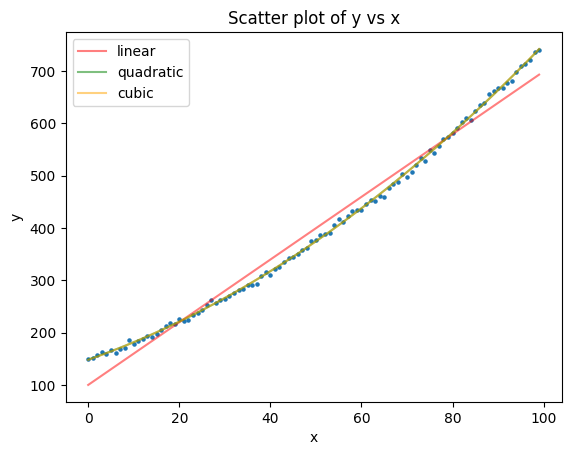

Coefficients from the linear fit: [100.052   5.991]
Coefficients from the quadratic fit: [1.485e+02 3.022e+00 2.999e-02]
Coefficients from the cubic fit: [1.485e+02 3.022e+00 2.999e-02]
The AIC value is 913.0 for the linear fit. 
The AIC value is 587.7 for the quadratic fit. 
The AIC value is 589.3 for the cubic fit.
The BIC value is 918.2 for the linear fit. 
The BIC value is 595.5 for the quadratic fit. 
The BIC value is 599.7 for the cubic fit.


In [10]:
curve_fitting(100, 150, 3, .03, 5)

## The epistemic import of likelihood


### Recall Kullback-Liebler divergence

Recall that we defined the Kullback-Leibler divergence as follows

$d_{KL}(p,q) = \sum_x p(x)\cdot \log \frac{p(x)}{q(x)}$ 

and we think about this as a kind of generalized distance between $p$ and $q$. 

### Choices with higher expected likelihoods are closer to the truth

The following proposition is part of the story of why a good AIC score is epistemic in nature: high (expected) likelihoods are closer to the truth in the sense of Kullback-Leibler divergence. There is admittedly more to the story about how to derive AIC from considerations of divergence. But it is why Sober calls a good AIC score a mark of "predictive accuracy" ({cite}`Sober2015-of` p. 131) and it is why he and Forster think that it is a positive reason to endorse the likelihood approach ({cite}`Forster2010-on` pp. 161-162). 

*Proposition*

Suppose that $p_0$ is the pdf which gives the true distribution of our random variable. 

For any other parameters $\theta, \theta^{\prime}$ the following are equivalent:

- $d_{KL}(p_0, p_{\theta})< d_{KL}(p_0, p_{\theta^{\prime}})$

- $\mathbb{E}_0 \log p_{\theta^{\prime}}<\mathbb{E}_0 \log p_{\theta}$

where the expectations in the second are with respect to $p_{0}$.

*Proof*:

One has $d_{KL}(p_0, p_{\theta})< d_{KL}(p_0, p_{\theta^{\prime}})$

iff $\sum_x p_0(x)\cdot \log \frac{p_0(x)}{p_{\theta}(x)}< \sum_x p_0(x)\cdot \log \frac{p_0(x)}{p_{\theta^{\prime}}(x)}$

iff $\sum_x p_0(x)\cdot \log p_0(x) - \sum_x p_0(x)\cdot \log p_{\theta}(x)< \sum_x p_0(x)\cdot \log p_0(x) - \sum_x p_0(x)\cdot \log p_{\theta^{\prime}}(x)$

iff $- \sum_x p_0(x)\cdot \log p_{\theta}(x) < - \sum_x p_0(x)\cdot \log p_{\theta^{\prime}}(x)$

iff $\sum_x p_0(x)\cdot \log p_{\theta^{\prime}}(x) < \sum_x p_0(x)\cdot \log p_{\theta}(x)$

iff $\mathbb{E}_0 \log p_{\theta^{\prime}}<\mathbb{E}_0 \log p_{\theta}$


